In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATA_DIR = './titanic'
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
df = pd.concat(df_list, sort=False)
df = df.reset_index(drop=True)

number_of_train_dataset = df.Survived.notnull().sum()
number_of_test_dataset = df.Survived.isnull().sum() 
y_true = df.pop("Survived")[:number_of_train_dataset]

df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [3]:
df.dtypes
df.info()
df.isnull().sum()
df.describe()
df.head(2).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22,38
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [4]:
pd.options.display.float_format = '{:.2f}'.format
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [5]:
df[df["Age"].notnull()].groupby(["Sex"])["Age"].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [6]:
df[df["Age"].notnull()].groupby(["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [7]:
df["Age"].fillna(
    df.groupby("Pclass")["Age"].transform("mean"), inplace=True)
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [8]:
df.groupby("Pclass")["Age"].transform("mean")

0      24.82
1      39.16
2      24.82
3      39.16
4      24.82
        ... 
1304   24.82
1305   39.16
1306   24.82
1307   24.82
1308   24.82
Name: Age, Length: 1309, dtype: float64

### One-hot encoding

In [9]:
object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

In [10]:
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null object
Pclass         1309 non-null object
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int32
Parch          1309 non-null int32
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int32(2), object(7)
memory usage: 102.4+ KB


In [12]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)

In [13]:
df.loc[61,"Embarked"]           = "S"
df.loc[829,"Embarked"]           = "S"

In [14]:
one_hot_df = merge_and_get(df, pd.get_dummies(df["Sex"], prefix="sex"), on=None, index=True) #sex_modified
one_hot_df = merge_and_get(df, pd.get_dummies(df["Pclass"], prefix="Pclass"), on=None, index=True) #sex_modified
one_hot_df = merge_and_get(df, pd.get_dummies(df["Embarked"], prefix="Embarked"), on=None, index=True) #sex_modified
del one_hot_df["Sex"]
del one_hot_df["Pclass"]
del one_hot_df["Embarked"]


### Bining 

In [15]:
one_hot_df["Fare"].value_counts()

8.05     60
13.00    59
7.75     55
26.00    50
7.90     49
         ..
33.50     1
7.80      1
26.39     1
15.58     1
7.14      1
Name: Fare, Length: 281, dtype: int64

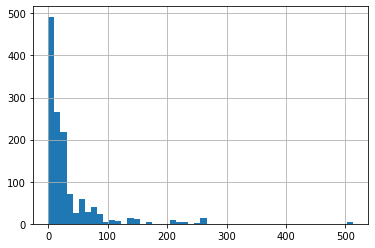

In [16]:
one_hot_df["Fare"].hist(bins=50)

Age [[ 1.        -0.0489137]
 [-0.0489137  1.       ]]
SibSp [[ 1.        -0.0353225]
 [-0.0353225  1.       ]]
Parch [[1.         0.08162941]
 [0.08162941 1.        ]]
Fare [[1.         0.25730652]
 [0.25730652 1.        ]]


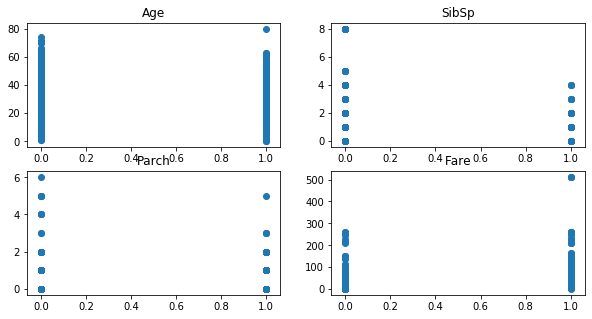

In [17]:
fig = plt.figure()
fig.set_size_inches(10,5) # 싸이즈 설정

ax = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2,2,i+1)) # 두개의 plot 생성
    X_1 = y_true
    Y_1 = one_hot_df[col_name][:number_of_train_dataset]
    
    ax[i].scatter(X_1, Y_1)
    ax[i].set_title(col_name)
    print(col_name, np.corrcoef(X_1,Y_1))

C:\Users\sc82c\AppData\Local\conda\conda\envs\dsme\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sc82c\AppData\Local\conda\conda\envs\dsme\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


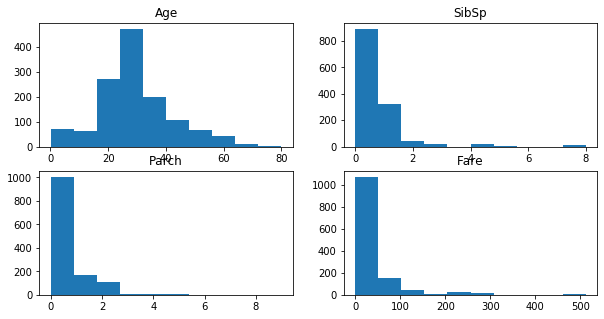

In [18]:
fig = plt.figure()
fig.set_size_inches(10,5) # 싸이즈 설정

ax = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2,2,i+1)) # 두개의 plot 생성
    X_1 = one_hot_df[col_name]
    
    ax[i].hist(X_1)
    ax[i].set_title(col_name)

In [19]:
df["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [20]:
bins = [-1, 0, 2, 5, 9]
group_name = ["l1", "l2", "l3", "l4"]

bin_one_hot_df = merge_and_get(one_hot_df,
    pd.get_dummies(pd.cut(df["Parch"], bins, labels=group_name ), prefix="parch"), on=None, index=True)

bins = [-1, 0, 1, 4, 10]
group_name = ["l1", "l2", "l3", "l4"]
bin_one_hot_df = merge_and_get(bin_one_hot_df,
    pd.get_dummies(pd.cut(df["SibSp"], bins, labels=group_name ), prefix="SibSp"), on=None, index=True)

bin_one_hot_df

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,parch_l1,parch_l2,parch_l3,parch_l4,SibSp_l1,SibSp_l2,SibSp_l3,SibSp_l4
0,1,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.25,NaN,0,0,1,1,0,0,0,0,1,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.28,C85,1,0,0,1,0,0,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.92,NaN,0,0,1,1,0,0,0,1,0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.10,C123,0,0,1,1,0,0,0,0,1,0,0
4,5,"Allen, Mr. William Henry",35.00,0,0,373450,8.05,NaN,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,"Spector, Mr. Woolf",24.82,0,0,A.5. 3236,8.05,NaN,0,0,1,1,0,0,0,1,0,0,0
1305,1306,"Oliva y Ocana, Dona. Fermina",39.00,0,0,PC 17758,108.90,C105,1,0,0,1,0,0,0,1,0,0,0
1306,1307,"Saether, Mr. Simon Sivertsen",38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,0,0,1,1,0,0,0,1,0,0,0
1307,1308,"Ware, Mr. Frederick",24.82,0,0,359309,8.05,NaN,0,0,1,1,0,0,0,1,0,0,0


### Log Transform

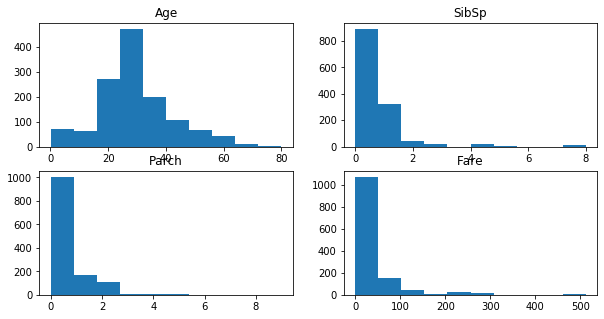

In [21]:
fig = plt.figure()
fig.set_size_inches(10,5) # 싸이즈 설정

ax = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2,2,i+1)) # 두개의 plot 생성
    X_1 = bin_one_hot_df[col_name]
    
    ax[i].hist(X_1)
    ax[i].set_title(col_name)

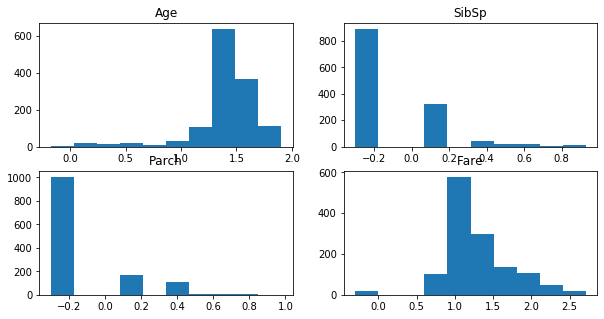

In [22]:
fig = plt.figure()
fig.set_size_inches(10,5) # 싸이즈 설정

ax = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2,2,i+1)) # 두개의 plot 생성
    X_1 = np.log10(bin_one_hot_df[col_name]+0.5)
    
    ax[i].hist(X_1)
    ax[i].set_title(col_name)

In [23]:
bin_one_hot_df.isnull().sum()

PassengerId       0
Name              0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked_C        0
Embarked_Q        0
Embarked_S        0
parch_l1          0
parch_l2          0
parch_l3          0
parch_l4          0
SibSp_l1          0
SibSp_l2          0
SibSp_l3          0
SibSp_l4          0
dtype: int64

In [24]:
bin_one_hot_df["Fare"] = bin_one_hot_df["Fare"].fillna(bin_one_hot_df["Fare"].mean())
# bin_one_hot_df.isnull().sum()

In [25]:
log_bin_one_hot_df = merge_and_get(bin_one_hot_df, np.log10(bin_one_hot_df["Fare"]+0.5), on=None, index=True)

log_bin_one_hot_df.rename(columns={'Fare_x':'base_fare',
                          'Fare_y':'log_fare'}, 
                 inplace=True)
log_bin_one_hot_df

,PassengerId,Name,Age,SibSp,Parch,Ticket,base_fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,parch_l1,parch_l2,parch_l3,parch_l4,SibSp_l1,SibSp_l2,SibSp_l3,SibSp_l4,log_fare
0,1,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.25,NaN,0,0,1,1,0,0,0,0,1,0,0,0.89
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.28,C85,1,0,0,1,0,0,0,0,1,0,0,1.86
2,3,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.92,NaN,0,0,1,1,0,0,0,1,0,0,0,0.93
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.10,C123,0,0,1,1,0,0,0,0,1,0,0,1.73
4,5,"Allen, Mr. William Henry",35.00,0,0,373450,8.05,NaN,0,0,1,1,0,0,0,1,0,0,0,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,"Spector, Mr. Woolf",24.82,0,0,A.5. 3236,8.05,NaN,0,0,1,1,0,0,0,1,0,0,0,0.93
1305,1306,"Oliva y Ocana, Dona. Fermina",39.00,0,0,PC 17758,108.90,C105,1,0,0,1,0,0,0,1,0,0,0,2.04
1306,1307,"Saether, Mr. Simon Sivertsen",38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,0,0,1,1,0,0,0,1,0,0,0,0.89
1307,1308,"Ware, Mr. Frederick",24.82,0,0,359309,8.05,NaN,0,0,1,1,0,0,0,1,0,0,0,0.93


### String handling

In [26]:
from collections import Counter
Counter((log_bin_one_hot_df["Name"].str.lower() + " ").sum().split()).most_common(3)

[('mr.', 757), ('miss.', 260), ('mrs.', 197)]

In [27]:
log_bin_one_hot_df["is_mr"] = log_bin_one_hot_df["Name"].str.lower().str.contains(pat = 'mr.') 
log_bin_one_hot_df["is_miss"] = log_bin_one_hot_df["Name"].str.lower().str.contains(pat = 'miss.') 
log_bin_one_hot_df["is_mrs"] = log_bin_one_hot_df["Name"].str.lower().str.contains(pat = 'mrs.') 

In [28]:
log_bin_one_hot_df["Ticket"].str.rsplit(expand=True, )

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
1304,A.5.,3236,None
1305,PC,17758,None
1306,SOTON/O.Q.,3101262,None
1307,359309,None,None


In [29]:
log_bin_one_hot_df["Ticket"].str.extractall('(\d+)')

0
     match         
0    0            5
     1        21171
1    0        17599
2    0            2
     1      3101282
...             ...
1304 1         3236
1305 0        17758
1306 0      3101262
1307 0       359309
1308 0         2668

[1373 rows x 1 columns]

In [30]:
Counter((log_bin_one_hot_df["Ticket"].str.lower() + " ").sum().split()).most_common(30)

[('pc', 92),
 ('c.a.', 46),
 ('sc/paris', 16),
 ('soton/o.q.', 16),
 ('2.', 15),
 ('w./c.', 14),
 ('ston/o', 14),
 ('a/5', 12),
 ('ca.', 12),
 ('2343', 11),
 ('a/5.', 10),
 ('ca', 10),
 ('f.c.c.', 9),
 ('2144', 8),
 ('1601', 8),
 ('soton/oq', 8),
 ('c', 8),
 ('ston/o2.', 7),
 ('347082', 7),
 ('347077', 7),
 ('3101295', 7),
 ('s.o.c.', 7),
 ('14879', 7),
 ('17608', 7),
 ('s.o./p.p.', 7),
 ('382652', 6),
 ('19950', 6),
 ('347088', 6),
 ('113781', 6),
 ('a/4', 6)]

In [31]:
log_bin_one_hot_df["is_pc"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'pc') 
log_bin_one_hot_df["is_ca"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'c.a.')  | log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'ca')
log_bin_one_hot_df["is_paris"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'paris')
log_bin_one_hot_df["is_soton"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'soton')
log_bin_one_hot_df["is_ston"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 'ston')
log_bin_one_hot_df["is_so"] = log_bin_one_hot_df["Ticket"].str.lower().str.contains(pat = 's.o')


In [32]:
log_bin_one_hot_df

,PassengerId,Name,Age,SibSp,Parch,Ticket,base_fare,Cabin,Embarked_C,Embarked_Q,...,log_fare,is_mr,is_miss,is_mrs,is_pc,is_ca,is_paris,is_soton,is_ston,is_so
0,1,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.25,NaN,0,0,...,0.89,True,False,False,False,False,False,False,False,False
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.28,C85,1,0,...,1.86,True,False,True,True,False,False,False,False,False
2,3,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.92,NaN,0,0,...,0.93,False,True,False,False,False,False,False,True,True
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.10,C123,0,0,...,1.73,True,False,True,False,False,False,False,False,False
4,5,"Allen, Mr. William Henry",35.00,0,0,373450,8.05,NaN,0,0,...,0.93,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,"Spector, Mr. Woolf",24.82,0,0,A.5. 3236,8.05,NaN,0,0,...,0.93,True,False,False,False,False,False,False,False,False
1305,1306,"Oliva y Ocana, Dona. Fermina",39.00,0,0,PC 17758,108.90,C105,1,0,...,2.04,False,False,False,True,False,False,False,False,False
1306,1307,"Saether, Mr. Simon Sivertsen",38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,0,0,...,0.89,True,False,False,False,False,False,True,False,False
1307,1308,"Ware, Mr. Frederick",24.82,0,0,359309,8.05,NaN,0,0,...,0.93,True,False,False,False,False,False,False,False,False


In [33]:
log_bin_one_hot_df.isnull().sum()

PassengerId       0
Name              0
Age               0
SibSp             0
Parch             0
Ticket            0
base_fare         0
Cabin          1014
Embarked_C        0
Embarked_Q        0
Embarked_S        0
parch_l1          0
parch_l2          0
parch_l3          0
parch_l4          0
SibSp_l1          0
SibSp_l2          0
SibSp_l3          0
SibSp_l4          0
log_fare          0
is_mr             0
is_miss           0
is_mrs            0
is_pc             0
is_ca             0
is_paris          0
is_soton          0
is_ston           0
is_so             0
dtype: int64

In [34]:
test = log_bin_one_hot_df["Cabin"].fillna("99999")
Counter((test.str.lower() + " ").sum().split()).most_common(30)

[('99999', 1014),
 ('f', 8),
 ('c23', 6),
 ('c25', 6),
 ('c27', 6),
 ('g6', 5),
 ('b57', 5),
 ('b59', 5),
 ('b63', 5),
 ('b66', 5),
 ('f33', 4),
 ('f2', 4),
 ('f4', 4),
 ('c78', 4),
 ('d', 4),
 ('c22', 4),
 ('c26', 4),
 ('b96', 4),
 ('b98', 4),
 ('e46', 3),
 ('b58', 3),
 ('b60', 3),
 ('e101', 3),
 ('e34', 3),
 ('a34', 3),
 ('c101', 3),
 ('b51', 3),
 ('b53', 3),
 ('b55', 3),
 ('c85', 2)]

In [35]:
log_bin_one_hot_df["is_cabin_none"] = test.str.contains(pat = '9999')
log_bin_one_hot_df["is_cabin_a"] = test.str.contains(pat = 'a')
log_bin_one_hot_df["is_cabin_b"] = test.str.contains(pat = 'b')
log_bin_one_hot_df["is_cabin_c"] = test.str.contains(pat = 'c')
log_bin_one_hot_df["is_cabin_d"] = test.str.contains(pat = 'd')
log_bin_one_hot_df["is_cabin_e"] = test.str.contains(pat = 'e')
log_bin_one_hot_df["is_cabin_f"] = test.str.contains(pat = 'f')
log_bin_one_hot_df["is_cabin_g"] = test.str.contains(pat = 'g')

In [36]:
log_bin_one_hot_df.head(2).T

,0,1
PassengerId,1,2
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Age,22.00,38.00
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
base_fare,7.25,71.28
Cabin,NaN,C85
Embarked_C,0,1
Embarked_Q,0,0


In [38]:
log_bin_one_hot_df.isnull().sum()

PassengerId         0
Name                0
Age                 0
SibSp               0
Parch               0
Ticket              0
base_fare           0
Cabin            1014
Embarked_C          0
Embarked_Q          0
Embarked_S          0
parch_l1            0
parch_l2            0
parch_l3            0
parch_l4            0
SibSp_l1            0
SibSp_l2            0
SibSp_l3            0
SibSp_l4            0
log_fare            0
is_mr               0
is_miss             0
is_mrs              0
is_pc               0
is_ca               0
is_paris            0
is_soton            0
is_ston             0
is_so               0
is_cabin_none       0
is_cabin_a          0
is_cabin_b          0
is_cabin_c          0
is_cabin_d          0
is_cabin_e          0
is_cabin_f          0
is_cabin_g          0
dtype: int64

### Feature Elimination

In [39]:
features = log_bin_one_hot_df.columns.tolist()
features

['PassengerId',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'base_fare',
 'Cabin',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'parch_l1',
 'parch_l2',
 'parch_l3',
 'parch_l4',
 'SibSp_l1',
 'SibSp_l2',
 'SibSp_l3',
 'SibSp_l4',
 'log_fare',
 'is_mr',
 'is_miss',
 'is_mrs',
 'is_pc',
 'is_ca',
 'is_paris',
 'is_soton',
 'is_ston',
 'is_so',
 'is_cabin_none',
 'is_cabin_a',
 'is_cabin_b',
 'is_cabin_c',
 'is_cabin_d',
 'is_cabin_e',
 'is_cabin_f',
 'is_cabin_g']

In [40]:
all_df = log_bin_one_hot_df.copy(deep=True)

elimination_features= ['PassengerId','Name','Cabin','Ticket']
for col_name in elimination_features:
    all_df.drop(col_name , axis=1, inplace=True)

In [41]:
all_df

,Age,SibSp,Parch,base_fare,Embarked_C,Embarked_Q,Embarked_S,parch_l1,parch_l2,parch_l3,...,is_ston,is_so,is_cabin_none,is_cabin_a,is_cabin_b,is_cabin_c,is_cabin_d,is_cabin_e,is_cabin_f,is_cabin_g
0,22.00,1,0,7.25,0,0,1,1,0,0,...,False,False,True,False,False,False,False,False,False,False
1,38.00,1,0,71.28,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,26.00,0,0,7.92,0,0,1,1,0,0,...,True,True,True,False,False,False,False,False,False,False
3,35.00,1,0,53.10,0,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,35.00,0,0,8.05,0,0,1,1,0,0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,24.82,0,0,8.05,0,0,1,1,0,0,...,False,False,True,False,False,False,False,False,False,False
1305,39.00,0,0,108.90,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1306,38.50,0,0,7.25,0,0,1,1,0,0,...,False,False,True,False,False,False,False,False,False,False
1307,24.82,0,0,8.05,0,0,1,1,0,0,...,False,False,True,False,False,False,False,False,False,False


In [42]:
X_train = all_df[:number_of_train_dataset].values
X_test = all_df[number_of_train_dataset:].values
y_train = y_true.copy()

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
idx = (all_df[number_of_train_dataset:].index+1).tolist()
y_pre = clf.predict(X_test)  

submission_columns = ["PassengerId","Survived"]
submission_df = pd.DataFrame( [idx,y_pre]).T
submission_df.columns = submission_columns
for col_name in submission_columns:
    submission_df[col_name] = submission_df[col_name].astype(int)
submission_df.to_csv("submission.csv", index=False)